# Text Analysis

Ava Santos-Volpe  
2025-10-08

# Text Analysis of Women in Headlines from 2010 to 2020

This data set consists of headlines tagged with the keywords “women OR
woman OR girl OR female OR lady OR ladies OR she OR her OR herself OR
aunt OR grandmother OR mother OR sister” were scraped from the top 50
news publications according to [similarweb](https://www.similarweb.com/)
in USA, India, UK and South Africa according using [rapidAPI google news
API](https://rapidapi.com/newscatcher-api-newscatcher-api-default/api/google-news).

[The Pudding
Link](https://github.com/the-pudding/data/tree/master/women-in-headlines)

Reference: When women make headlines. (n.d.). The Pudding.
https://pudding.cool/2022/02/women-in-headlines/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

New names:
Rows: 382139 Columns: 7
── Column specification
──────────────────────────────────────────────────────── Delimiter: "," chr
(4): url, headline_no_site, site, country dbl (2): ...1, bias dttm (1): time
ℹ Use `spec()` to retrieve the full column specification for this data. ℹ
Specify the column types or set `show_col_types = FALSE` to quiet this message.
• `` -> `...1`

`summarise()` has grouped output by 'theme'. You can override using the
`.groups` argument.

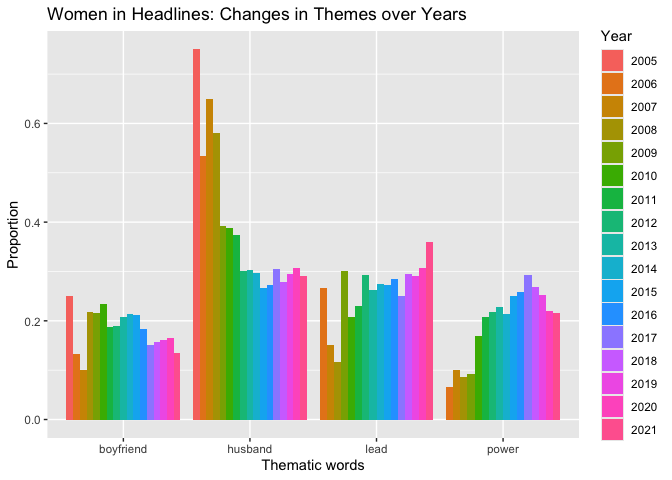

In [ ]:
#| label: headlines_time

library(tidyverse)

This graph is showing how headlines about women have changed over time.
This shows a decrease in the use of words like “husband” and “boyfriend”
in headlines. It also shows an increase in the use of words like “lead”
and “power” over time. This pattern isn’t perfect and certain years
don’t follow this, but for the most part it seems like headlines about
men have decreased and headlines about leading and power have increased.

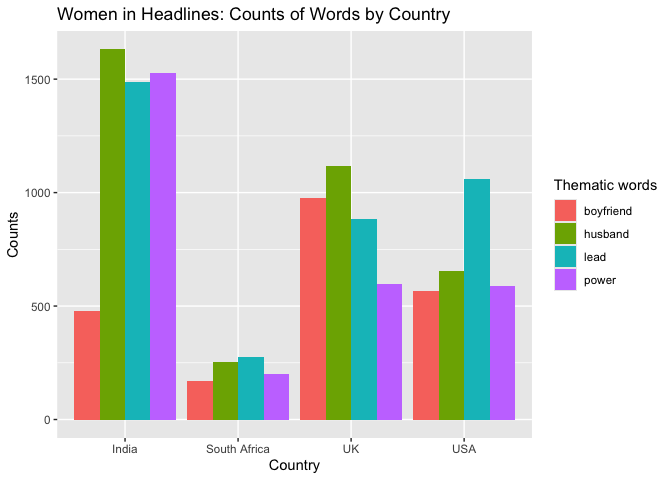

In [ ]:
#| label: headlines_country

by_country <- headlines |>
  group_by(country) |>
  summarize(boyfriend = sum(str_detect(headline_no_site, "boyfriend+")),
            husband = sum(str_detect(headline_no_site, "husband+")),
            lead = sum(str_detect(headline_no_site, "lead+")),
            power = sum(str_detect(headline_no_site, "power+"))
            ) |>
    pivot_longer(
    cols = c(boyfriend, husband, lead, power),
    names_to = "theme",
    values_to = "counts"
  ) 

ggplot(by_country, aes(x = country, y = counts, fill = theme)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    x = "Country", 
    y = "Counts",
    fill = "Thematic words",
    title = "Women in Headlines: Counts of Words by Country"
  )

This graph shows the counts of each thematic word by country. The
highest category in the US is “lead” and the lowest is “boyfriend”. The
highest category in the UK is “husband” and the lowest is “power”. The
highest category in South Africa is “lead” and the lowest is
“boyfriend”. The highest category in India “husband” and the lowest is
“boyfriend”.